In [5]:
import pickle

with open('problem_batch_132236.pkl', "rb") as f:
    batch = pickle.load(f)

print(batch.keys())

dict_keys(['teacher_forcing', 'hidden', 'z', 'mu', 'log_var', 'std', 'type_noise_level', 'type_noise', 'noisy_ratios', 'pred_composition_per_crystal', 'pred_composition_ratio', 'pred_lengths', 'pred_angles', 'zeolite_code'])


In [8]:
batch['hidden'].shape

torch.Size([32, 256])

In [25]:
import torch
import numpy as np

# Check if there are any zeros in log_var
# Check if there are any zeros in the tensor
tensor = batch["hidden"][0]
has_zeros = (tensor == np.inf).any()

print("Are there any zeros in the tensor?", has_zeros)

# Find the indices of zeros
if has_zeros:
    zero_indices = torch.nonzero(tensor == np.inf, as_tuple=True)
    print("Indices of zeros:", zero_indices)

Are there any zeros in the tensor? tensor(False, device='cuda:0')


In [26]:
batch["hidden"][0]


tensor([-1666.3394,  1677.5157,  1389.6387, -5197.3540,  1426.0746,  1360.2694,
        -3355.5010,  2005.0167, -2274.3875, -2506.7661,  1888.0508, -2144.9778,
         4118.8477, -1636.0228,   825.4019, -2640.9412,  -758.1225,  -369.9879,
         1362.9254,  1693.1212,  2865.1189, -1966.6060, -2128.8438, -4598.7051,
        -1396.6757, -2253.1345,  2408.5071, -1187.1918,  2120.0437,   811.4233,
        -2225.0933, -1448.2877, -1288.5941, -2513.7468,  1649.0204,  -681.6293,
         3485.9893,  2900.3704, -2065.7598,  -213.1639, -3549.8875,  2200.5999,
         2675.5308, -3462.5349,  -292.1599,  3838.4558,  2586.2571, -1433.2880,
        -1760.2212, -3066.4216, -3800.4905,   312.3336, -1559.3802, -1728.0890,
         2217.6372, -1906.7070,  1652.1307, -1168.3149,  -605.0220, -2518.7642,
         -471.1114,  1462.2330,   132.9921,  1318.4530,  1500.5635, -3793.3132,
          638.1820, -2826.8281, -1924.3115, -1941.5449,  1690.3389,   417.6030,
        -2581.7024,  -696.8972, -3861.65

# Manually calculate the reperametrization to debug

In [42]:
std = torch.exp(0.5 * batch["log_var"])
print(std[21])

tensor([       inf, 4.3814e+04, 0.0000e+00, 2.5115e-12, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 8.6683e+01, 9.2178e-13,
        3.4630e+10, 0.0000e+00, 0.0000e+00, 0.0000e+00,        inf,        inf,
        4.0375e-32, 0.0000e+00, 1.6546e-35, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.1369e+19, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5476e-29,
        0.0000e+00, 0.0000e+00, 8.2682e-31, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.2834e-19, 0.0000e+00,        inf, 5.0554e-33,        inf, 0.0000e+00,
        0.0000e+00,        inf, 1.7469e-11, 0.0000e+00, 0.0000e+00, 1.0571e-35,
        0.0000e+00, 2.8780e-14, 2.1135e+16, 2.4837e-10, 8.2974e-30, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.8421e-16, 0.0000e+00, 1.4426e+18, 5.4215e-38,
               inf, 7.9899e+34,        inf,        inf,        inf, 4.5906e+00,
        0.0000e+00, 3.5344e-41, 0.0000e+00, 6.0985e-18, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.5784e-23, 1.0198e-

In [50]:
infs = torch.isinf(std)
inf_vars = batch["hidden"][infs]

inf_vars
# Add 1.0e-5 to std to avoid numerical issues
# std = std + 1.0e-5

tensor([ 129.0967,  230.9128,   48.6249, -178.0161,   54.1289,  -95.5015,
          85.7649, -294.9868, -456.7326, -369.7369,   33.6901, -176.3946,
         -37.1628,  129.8844,   -5.3824,  125.3446,   31.2599,  292.0277,
        -119.1616,   15.5657,    6.1816, -326.8035,  -56.0833,  453.3897,
        -312.9032,  -26.9069, -169.9389,  125.3056,   86.7557,  113.5637,
         247.3035,  143.8527,   35.5910,  109.9781,  604.1691,   60.7594,
         219.4354,   64.4354,   58.4128, -107.6946, -551.6886,  -97.2904,
        -284.3695,  180.4452,  109.9418,  373.6216,    5.3577, -399.7304,
        -134.6598,  502.4964,  118.2911,  210.9796,   44.4203, -163.8744,
          49.6532,  -88.1873,   78.8175, -271.0478, -420.7742, -338.7654,
          29.6307, -162.5306,  -33.6047,  119.5128,   -4.6132,  113.9180,
          28.9446,  267.9477, -110.0018,   13.6904,    5.7687, -300.0675,
         -52.0714,  416.1980, -288.2949,  -23.9851,  115.9351,   78.7653,
         104.6490,  132.0693,   31.501

In [55]:
print(batch["hidden"][19])

tensor([ 129.0967, -116.8500,   -3.3171,  219.1459,  329.9656,  177.4355,
         273.8464,  342.0847,  -28.7820,  258.6921,  330.2703,   61.8026,
        -219.2913,   17.7702,  -57.5583, -290.6929,  230.9128,   48.6249,
         157.9802,   41.6367, -190.3991,  276.4946,  213.9995,  164.3351,
         290.3575, -114.8627,  122.2806,  345.2719,   66.6375,  299.9480,
         120.8456, -209.2259,   93.8372,  382.5962,  254.0075,   41.7009,
         -56.5346,  -31.3961, -178.0161,  -12.7625,   54.1289,  -15.2850,
        -136.5049,  -95.5015,  249.4805,   83.3680,  -24.9148,  230.8171,
          89.5714, -188.2922,  151.5880,  119.5286, -187.1657, -120.2322,
         129.5647,  -60.2242,   47.4536, -118.0423,  -43.6911,    8.5754,
          85.7649,  494.3936, -294.9868, -456.7326, -369.7369,   97.0381,
         -97.8754,  -23.5231, -243.5275,   31.7376,   13.5977, -214.5719,
         -59.1845,  316.6762,  -78.0521,  313.4030,  184.8552, -148.3670,
          33.6901,   70.6809,  418.638

In [27]:
eps = torch.randn_like(std)

In [28]:
z = eps = torch.randn_like(std)

In [29]:
print(z[4])

tensor([-2.1877e+00, -9.3315e-01,  2.0667e-01, -4.5101e-01, -1.2737e-01,
        -2.8203e-01, -8.0773e-01, -7.8788e-01, -2.1217e-01,  1.1464e+00,
        -3.6520e-01,  8.2606e-01, -2.3214e-01, -4.0483e-02,  1.0863e+00,
        -3.0950e-01,  3.3402e-01, -7.3161e-01,  6.6410e-01,  3.2827e-01,
        -8.9543e-01, -1.7611e+00, -3.1567e-01,  6.2824e-01, -1.7882e+00,
         6.5130e-01, -6.3121e-01,  1.5798e+00, -2.5317e-01,  9.5822e-01,
        -2.4429e+00, -1.4429e+00, -9.3468e-01,  1.1548e+00,  2.2436e+00,
         1.2522e+00, -1.2966e+00, -5.3653e-01, -1.5559e-01, -1.2729e-01,
         4.6198e-01, -4.9798e-01,  2.6103e-01, -1.4992e+00, -6.4244e-01,
         1.2935e+00,  1.6235e+00,  8.3771e-01,  8.9202e-01,  6.2177e-01,
         3.1567e-01,  2.0594e+00, -4.2000e-01, -1.6592e+00,  5.9488e-01,
         3.0973e-01, -1.6214e+00, -1.7168e-01, -4.3706e-01,  3.9610e-01,
        -3.6439e-01,  9.1969e-01,  2.8408e+00, -7.5252e-01, -2.0401e-01,
        -7.9450e-01, -1.6022e+00, -4.7456e-01, -1.4

# Plot histograms of the hidden representation and mu and log_var

Here I want to plot the histograms of the hidden output of GemNet and the mu and log_var which are in turn outputs from the MLPs that predict the mu and sigma for the calculation of z

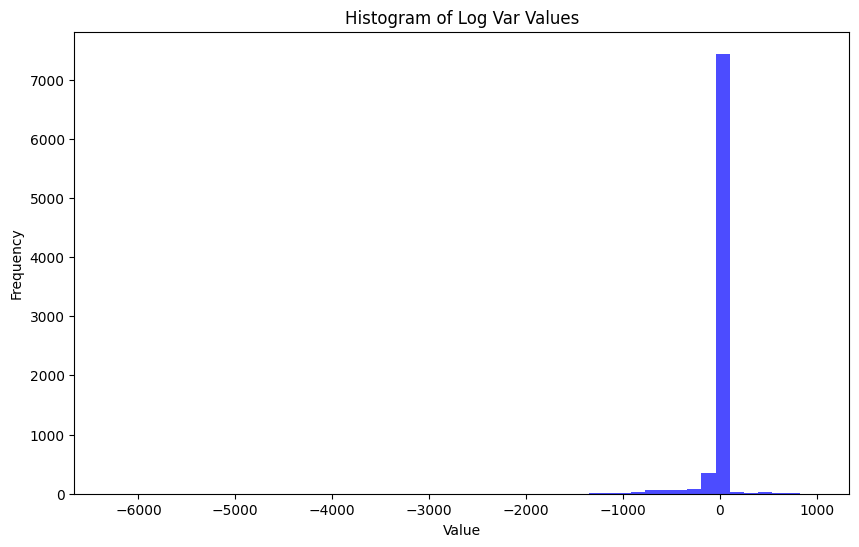

In [58]:
import torch
import matplotlib.pyplot as plt

# Step 2: Extract the tensor you want to visualize
# For example, let's say you want to visualize all the pixel values in the batch
tensor_to_visualize = batch["log_var"]  # This could be batch[0], or any specific tensor in the batch

# Step 3: Convert to NumPy and flatten
tensor_np = tensor_to_visualize.detach().cpu().numpy().flatten()

# Step 4: Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(tensor_np, bins=50, color='blue', alpha=0.7)
plt.title("Histogram of Log Var Values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [52]:
# Check for very close to 0
import torch

# Example tensor
tensor = batch['hidden']

# Define the threshold
threshold = 400

# Check if there are any elements smaller than the threshold
close_to_zero = (tensor.abs() > threshold).any()

print("Are there any elements close to zero?", close_to_zero)

# Find the indices of elements close to zero
if close_to_zero:
    close_to_zero_indices = torch.nonzero(tensor.abs() > threshold, as_tuple=True)
    print("Indices of elements close to zero:", close_to_zero_indices)

Are there any elements close to zero? tensor(True, device='cuda:0')
Indices of elements close to zero: (tensor([19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 21, 21, 21, 21,
        21, 21, 21, 21, 21, 21], device='cuda:0'), tensor([ 61,  63,  80,  82, 106, 120, 150, 155, 183, 187, 204, 228, 251, 253,
         61,  63, 106, 120, 150, 155, 187, 204, 228, 253], device='cuda:0'))


In [4]:
import torch
torch.min(batch["z"])

tensor(-inf, device='cuda:0', grad_fn=<MinBackward1>)

In [14]:
import torch
torch.set_printoptions(threshold=20_000)
print(batch["pred_"])

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
      

# Load and inspect the weights of the model

In [1]:
import torch

# Load the weights of the model
model = torch.load("model_weights_132221.pth")

In [2]:
# Inspect the weights
encoder_weight_keys = [key for key in model if key.startswith("encoder.gemnet") and 'weight' in key]
print(len(encoder_weight_keys))
print(encoder_weight_keys)

179
['encoder.gemnet.mlp_rbf3.linear.weight', 'encoder.gemnet.mlp_cbf3.weight', 'encoder.gemnet.mlp_rbf_h.linear.weight', 'encoder.gemnet.mlp_rbf_out.linear.weight', 'encoder.gemnet.atom_emb.embeddings.weight', 'encoder.gemnet.atom_latent_emb.weight', 'encoder.gemnet.edge_emb.dense.linear.weight', 'encoder.gemnet.out_blocks.0.dense_rbf.linear.weight', 'encoder.gemnet.out_blocks.0.layers.0.linear.weight', 'encoder.gemnet.out_blocks.0.layers.1.dense_mlp.0.linear.weight', 'encoder.gemnet.out_blocks.0.layers.1.dense_mlp.1.linear.weight', 'encoder.gemnet.out_blocks.0.layers.2.dense_mlp.0.linear.weight', 'encoder.gemnet.out_blocks.0.layers.2.dense_mlp.1.linear.weight', 'encoder.gemnet.out_blocks.0.layers.3.dense_mlp.0.linear.weight', 'encoder.gemnet.out_blocks.0.layers.3.dense_mlp.1.linear.weight', 'encoder.gemnet.out_blocks.0.seq_energy.0.linear.weight', 'encoder.gemnet.out_blocks.0.seq_energy.1.dense_mlp.0.linear.weight', 'encoder.gemnet.out_blocks.0.seq_energy.1.dense_mlp.1.linear.weight'

In [24]:
# Check which parameters contain a nan value
for key in encoder_weight_keys:
    if torch.isnan(model[key]).any():
        print(key)

# Find any outliers in the weights

for key in encoder_weight_keys:
    if torch.abs(model[key]).max() > 1:
        print(key)

encoder.gemnet.atom_emb.embeddings.weight
encoder.gemnet.out_blocks.0.scale_sum.scale_factor
encoder.gemnet.out_blocks.0.scale_rbf_F.scale_factor
encoder.gemnet.out_blocks.1.scale_sum.scale_factor
encoder.gemnet.out_blocks.1.scale_rbf_F.scale_factor
encoder.gemnet.out_blocks.2.scale_sum.scale_factor
encoder.gemnet.out_blocks.2.scale_rbf_F.scale_factor
encoder.gemnet.out_blocks.3.scale_sum.scale_factor
encoder.gemnet.out_blocks.3.scale_rbf_F.scale_factor
encoder.gemnet.int_blocks.0.trip_interaction.scale_rbf.scale_factor
encoder.gemnet.int_blocks.0.trip_interaction.scale_cbf_sum.scale_factor
encoder.gemnet.int_blocks.0.atom_update.scale_sum.scale_factor
encoder.gemnet.int_blocks.1.trip_interaction.scale_rbf.scale_factor
encoder.gemnet.int_blocks.1.trip_interaction.scale_cbf_sum.scale_factor
encoder.gemnet.int_blocks.1.atom_update.scale_sum.scale_factor
encoder.gemnet.int_blocks.2.trip_interaction.scale_rbf.scale_factor
encoder.gemnet.int_blocks.2.trip_interaction.scale_cbf_sum.scale_fac

In [3]:
import torch
import matplotlib.pyplot as plt

# Plot a histogram of each element in the weight matrix and save it to a new folder called 'weights'

for key in encoder_weight_keys:
    if not torch.isnan(model[key]).any():
        weight = model[key]
        plt.hist(weight.flatten().cpu().numpy(), bins=50, color='blue', alpha=0.7)
        plt.title(f"Histogram of {key}")
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        plt.savefig(f"weights/weights_132221/{key}.png")
        plt.close()
        

In [23]:
print(model["encoder.gemnet.mlp_rbf3.linear.weight"])

tensor([[-0.0225,  0.1255, -0.1142,  ..., -0.1343, -0.0143, -0.0974],
        [ 0.1928, -0.0729,  0.0238,  ..., -0.0560, -0.0712,  0.0505],
        [-0.0260,  0.0080,  0.1096,  ...,  0.0294, -0.0062,  0.0515],
        ...,
        [-0.0048,  0.1910, -0.0066,  ..., -0.1289,  0.0290, -0.0500],
        [-0.1714,  0.0670,  0.0568,  ..., -0.0368, -0.1323, -0.0091],
        [ 0.0629,  0.0952,  0.0232,  ..., -0.1114,  0.0180, -0.0711]],
       device='cuda:0')
